# Use the Scatterwidget with AnnData from Notebook

This tutorial is an example of how to use the Napari-Spatialdata ScatterWidget from a notebook.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [1]:
%load_ext autoreload
%autoreload 2

from napari_spatialdata import QtAdataScatterWidget
import squidpy as sq
import matplotlib.pyplot as plt

In [2]:
import napari_spatialdata
napari_spatialdata.__file__

'D:\\kasia\\napari-spatialdata\\src\\napari_spatialdata\\__init__.py'

Load in the AnnData:

In [3]:
adata = sq.datasets.visium_hne_adata()

The following line is needed to initialize a widget without a QApplication:

In [4]:
%gui qt5

Open the ScatterWidget:

In [5]:
widget = QtAdataScatterWidget(adata)
widget.show()

AttributeError: 'GraphicsScene' object has no attribute 'sigMouseReleased'

In [15]:
widget.plot_widget.current_shape

[(2281.602462068071, 1806.041420018756)]

2024-05-31 17:03:40.781 | INFO     | napari_spatialdata._scatterwidgets:plot:245 - Generating scatter plot...
2024-05-31 17:04:45.614 | INFO     | napari_spatialdata._scatterwidgets:plot:245 - Generating scatter plot...
2024-05-31 17:04:58.669 | INFO     | napari_spatialdata._scatterwidgets:plot:245 - Generating scatter plot...
2024-06-03 10:50:36.534 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - Right click detected
2024-06-03 11:05:22.666 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - Right click detected
2024-06-03 11:05:24.127 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - Right click detected
2024-06-03 11:05:31.195 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - Right click detected
2024-06-03 11:05:31.933 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - Right click detected
2024-06-03 11:05:32.550 | INFO     | napari_spatialdata._scatterwidgets:mouseClickEvent:199 - R

In [21]:
widget.plot_widget.polygons

[]

In [30]:
widget.plot_widget.scatter_plot.enableAutoRange('xy', True)

In [28]:
widget.plot_widget.scatter_plot.removeItem(widget.plot_widget.scatter)

2024-05-31 14:13:52.731 | INFO     | napari_spatialdata._scatterwidgets:plot:265 - Generating scatter plot...


In [7]:
import sys
import pyqtgraph as pg
from PyQt5 import QtGui, QtCore
from pyqtgraph.Qt import QtWidgets

class LassoDrawer(pg.GraphicsView):
    def __init__(self):
        super(LassoDrawer, self).__init__()
        self.scene = self.scene()
        self.view = self.addViewBox()
        self.view.setAspectLocked(True)

        self.lasso = None
        self.shapes = []

        self.setMouseTracking(True)
        self.last_pos = None
        self.current_shape = []

    def mousePressEvent(self, event):
        if event.button() == QtCore.Qt.LeftButton:
            self.current_shape = []
            self.lasso = pg.PlotDataItem(symbol='o', symbolBrush='r')
            self.view.addItem(self.lasso)
            self.shapes.append(self.lasso)
            self.update_lasso(event)

    def mouseMoveEvent(self, event):
        if self.lasso:
            self.update_lasso(event)

    def mouseReleaseEvent(self, event):
        self.lasso = None
        self.last_pos = None

    def update_lasso(self, event):
        pos = self.view.mapSceneToView(event.pos())
        if self.last_pos is None or (pos - self.last_pos).length() > 5:  # Throttle point creation
            self.current_shape.append((pos.x(), pos.y()))
            self.lasso.setData(self.current_shape)
            self.last_pos = pos

app = QtWidgets.QApplication(sys.argv)
win = LassoDrawer()
win.show()
sys.exit(app.exec_())


2024-05-31 13:54:39.737 | INFO     | napari_spatialdata._scatterwidgets:plot:266 - Generating scatter plot.
2024-05-31 13:54:44.784 | INFO     | napari_spatialdata._scatterwidgets:plot:266 - Generating scatter plot.


In [6]:
widget.plot_widget.scatter_plot.dataItems

In [11]:
test = [([int(255 * c) for c in color]) for color in widget.plot_widget.data[2]]
test

[[220, 226, 24, 255],
 [48, 103, 141, 255],
 [72, 30, 112, 255],
 [165, 218, 53, 255],
 [67, 60, 132, 255],
 [49, 100, 141, 255],
 [72, 30, 112, 255],
 [30, 156, 137, 255],
 [71, 192, 110, 255],
 [32, 143, 140, 255],
 [37, 171, 129, 255],
 [32, 164, 133, 255],
 [72, 30, 112, 255],
 [43, 116, 142, 255],
 [71, 40, 120, 255],
 [37, 131, 141, 255],
 [36, 134, 141, 255],
 [30, 151, 138, 255],
 [69, 53, 128, 255],
 [68, 57, 130, 255],
 [39, 126, 142, 255],
 [71, 15, 98, 255],
 [165, 218, 53, 255],
 [178, 221, 44, 255],
 [124, 210, 79, 255],
 [35, 168, 131, 255],
 [248, 230, 33, 255],
 [71, 192, 110, 255],
 [35, 136, 141, 255],
 [70, 47, 124, 255],
 [35, 168, 131, 255],
 [71, 22, 105, 255],
 [40, 123, 142, 255],
 [33, 141, 140, 255],
 [109, 206, 88, 255],
 [165, 218, 53, 255],
 [63, 69, 135, 255],
 [72, 30, 112, 255],
 [61, 75, 137, 255],
 [49, 100, 141, 255],
 [56, 87, 140, 255],
 [69, 50, 127, 255],
 [157, 217, 58, 255],
 [30, 158, 136, 255],
 [71, 37, 117, 255],
 [60, 78, 138, 255],
 [63, 

In [20]:
test[0].value()

226

In [9]:
widget.plot_widget.data[2]

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       ...,
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.177423, 0.437527, 0.557565, 1.      ]])

In [8]:
dir(widget.plot_widget.scatter_plot)

['CacheMode',
 'DeviceCoordinateCache',
 'GraphicsItemChange',
 'GraphicsItemFlag',
 'GraphicsItemFlags',
 'ItemAcceptsInputMethod',
 'ItemChildAddedChange',
 'ItemChildRemovedChange',
 'ItemClipsChildrenToShape',
 'ItemClipsToShape',
 'ItemContainsChildrenInShape',
 'ItemCoordinateCache',
 'ItemCursorChange',
 'ItemCursorHasChanged',
 'ItemDoesntPropagateOpacityToChildren',
 'ItemEnabledChange',
 'ItemEnabledHasChanged',
 'ItemFlagsChange',
 'ItemFlagsHaveChanged',
 'ItemHasNoContents',
 'ItemIgnoresParentOpacity',
 'ItemIgnoresTransformations',
 'ItemIsFocusable',
 'ItemIsMovable',
 'ItemIsPanel',
 'ItemIsSelectable',
 'ItemMatrixChange',
 'ItemNegativeZStacksBehindParent',
 'ItemOpacityChange',
 'ItemOpacityHasChanged',
 'ItemParentChange',
 'ItemParentHasChanged',
 'ItemPositionChange',
 'ItemPositionHasChanged',
 'ItemRotationChange',
 'ItemRotationHasChanged',
 'ItemScaleChange',
 'ItemScaleHasChanged',
 'ItemSceneChange',
 'ItemSceneHasChanged',
 'ItemScenePositionHasChanged',
 

The widget:

(-0.5, 861.5, 719.5, -0.5)

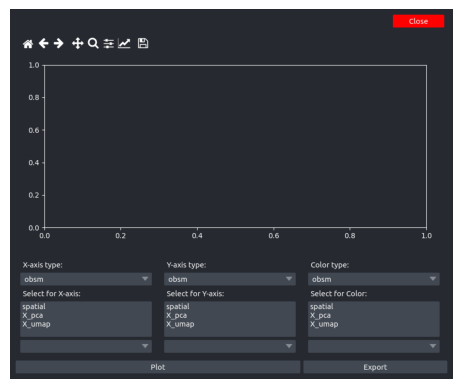

In [15]:
plt.imshow(widget.screenshot())
plt.axis('off')

Some examples of scatterplots:

(-0.5, 861.5, 719.5, -0.5)

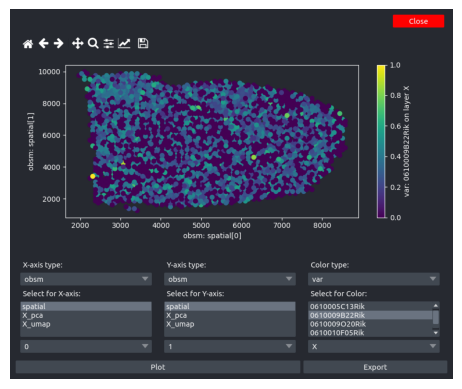

In [19]:
plt.imshow(widget.screenshot())
plt.axis('off')

(-0.5, 861.5, 719.5, -0.5)

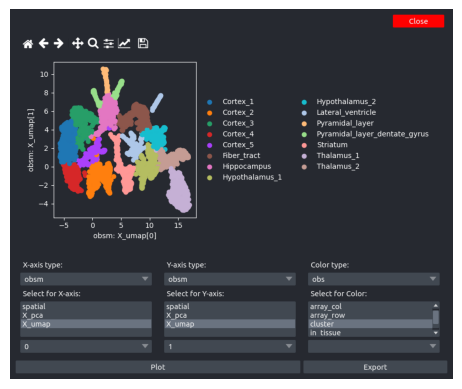

In [21]:
plt.imshow(widget.screenshot())
plt.axis('off')